# WSL final pass analysis
How and where are teams doing 'the final pass', and how effective was it?

In [122]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Competitions, Match, Season, ignore_warnings, search_in_dataframe
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

ignore_warnings()

In [123]:
competitions = Competitions()
season = competitions.get_season("FA Women's Super League", "2020/2021")

/Users/gsheir/Documents/Statsbomb/football_analysis/venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/gsheir/Documents/Statsbomb/football_analysis/venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/gsheir/Documents/Statsbomb/football_analysis/venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/gsheir/Documents/Statsbomb/football_analysis/venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [124]:
all_shots = season.get_events(type="Shot")
all_passes = season.get_events(type="Pass")

In [125]:
shot_assist_passes = search_in_dataframe(all_passes, pass_shot_assist=True)

In [126]:
shot_assists_and_shots = pd.merge(shot_assist_passes, all_shots, left_on="pass_assisted_shot_id", right_on="id", suffixes=["_pass", "_shot"])

In [127]:
shot_assist_and_shot = shot_assists_and_shots.iloc[0]
shot_assist_and_shot.dropna()


duration_pass                                                           0.91929
id_pass                                    d6a56e56-0598-4985-8f1e-44b87591e2cf
index_pass                                                                   86
location_pass                                                      [93.8, 55.0]
match_id_pass                                                           3775648
minute_pass                                                                   1
pass_angle_pass                                                        0.529247
pass_assisted_shot_id_pass                 7b6ab918-87a4-4933-85b7-d8965938a45e
pass_body_part_pass                                                  Right Foot
pass_end_location_pass                                             [99.1, 58.1]
pass_height_pass                                                    Ground Pass
pass_length_pass                                                       6.140033
pass_recipient_pass                     

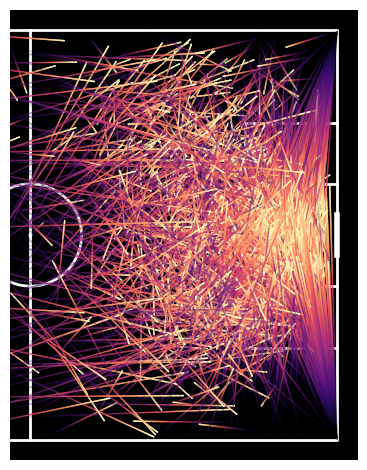

In [128]:
pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2)
fig, ax = pitch.draw()


pass_arrows = pitch.lines(
    [location[0] for location in shot_assists_and_shots["location_pass"].values],
    [location[1] for location in shot_assists_and_shots["location_pass"].values],
    [location[0] for location in shot_assists_and_shots["pass_end_location_pass"].values],
    [location[1] for location in shot_assists_and_shots["pass_end_location_pass"].values],
    # color=shot_assists_and_shots["shot_statsbomb_xg_shot"],
    cmap="magma",
    ax=ax,
    lw=1,
    comet=True,
    transparent=True
    )

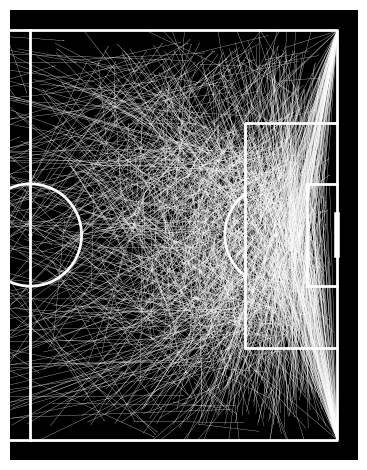

In [129]:
pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2)
fig, ax = pitch.draw()


pass_arrows = pitch.arrows(
    [location[0] for location in shot_assists_and_shots["location_pass"].values],
    [location[1] for location in shot_assists_and_shots["location_pass"].values],
    [location[0] for location in shot_assists_and_shots["pass_end_location_pass"].values],
    [location[1] for location in shot_assists_and_shots["pass_end_location_pass"].values],
    # color=shot_assists_and_shots["shot_statsbomb_xg_shot"],
    cmap="magma",
    ax=ax,
    width=0.2,
    color="#ffffff"
    )

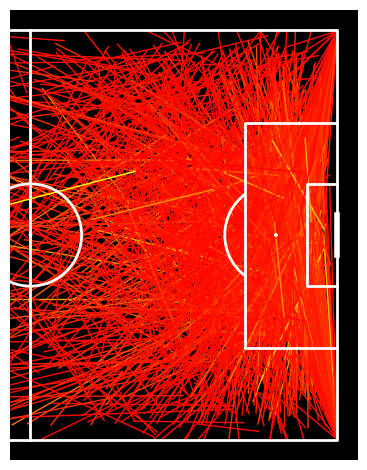

In [130]:
from matplotlib.collections import LineCollection
pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=9999)
fig, ax = pitch.draw()


pass_arrows = LineCollection(
    [list(row) for row in shot_assists_and_shots[["location_pass", "pass_end_location_pass"]].values],
    array=shot_assists_and_shots["shot_statsbomb_xg_shot"],
    cmap='autumn',
    linewidth=(1)
    )

ax.add_collection(pass_arrows)